<a href="https://colab.research.google.com/github/IbrahemAmar/Data-mining-and-Machine-Learning-/blob/main/lab4_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [266]:
# import regular expressins packge
# import numbers package
# supress system warnings
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["LOKY_MAX_CPU_COUNT"] = "1"
from sklearn.cluster import KMeans
from scipy.stats import mode
import matplotlib.pyplot as plt
import numpy as np
import re

In [267]:
def readFile(fileName):
    file = open(fileName,'r',encoding="cp437")
    fileText = ""
    for line in file:
        fileText += line
    return fileText

In [268]:
# preprocess text
def preProcess(text):
# Remove non-letter chars
    text = re.sub("[^a-zA-Z ]"," ", text)
# Change characters to lower
    text = text.lower()
    return text

In [269]:
# generate a word set of a given text
def genReferenceWordList(texts,stopWords):
# concatenate the texts
    allText = ""
    for line in texts:
        allText += line
    # Generate a word list
    wordsList =  allText.split()
    # Generate a word set
    wordsSet =  set(wordsList)
    # Remove the stop words from the word list
    stopWordsList = stopWords.split()
    stopWordsSet = set(stopWordsList)
    refWordSet = wordsSet.difference(stopWordsSet)
    return list(refWordSet)

In [270]:
# word frequency
def getWordFrequency(texts,refList):

    refListSize = len(refList)
    nTexts = len(texts)
    wordFreq = np.empty((nTexts,refListSize),dtype=np.int64)
    for i in range(nTexts):            # scan texts
        print("text" + str(i))
        for j in range(refListSize):      # scan words in dict
            wordFreq[i,j] = texts[i].count(refList[j])
    return wordFreq

In [271]:
#Partition the text into a list of chunks of size windSize
def partitionText(text, windSize,label):
    nParts = len(text)//windSize
    chunks=[]
    labels = []
    for i in range(nParts):
        nextWind = i*windSize
        nextChunk = text[nextWind:nextWind+windSize]
        chunks += [nextChunk]
        labels += [label]
    return chunks,labels;

In [272]:
# plot labels in bar chart
def plotLabels(labels,labelsType):

    plt.title("The " +  labelsType + " labels")
    plt.xlabel("partition#")
    plt.ylabel("label")
    plt.bar(range(len(labels)),labels)
    plt.show()

In [273]:
# rearange predicted labels
# according to the most common true label
def rearangeLabels(trueLabels,predLabels,k):
    rearangedLabels = np.zeros(len(trueLabels))
    for i in range(k):
        predIs = np.where((i+1)==predLabels)[0]
        # Get the true labels in the predicted locations
        trueLabelsInLoc = trueLabels[predIs]
        # find the common label
        commonLabel,count = mode(trueLabelsInLoc)
        # put the comon true label in the predicted location
        rearangedLabels[predIs] = commonLabel
    return rearangedLabels

In [274]:
bookTexts = []
#read  and preprocess files
bookTexts += [readFile('DB.txt')]
bookTexts += [readFile('Eliot.txt')]
bookTexts += [readFile('Tolkien.txt')]

In [275]:
texts = []
for text in bookTexts:
    texts += [preProcess(text)]

In [276]:
# Read stop words file - words that can be removed
stopWords = readFile('stopwords_en.txt')

In [277]:
# Generate dictionary
refList = genReferenceWordList(texts,stopWords)

In [278]:
#wind - chunks size
window = 15000

In [279]:
chunks = []
trueLabels = []
for i, text in enumerate(texts):
    newChunks,newLabels = partitionText(text , window,i+1)
    chunks += newChunks
    trueLabels+=newLabels

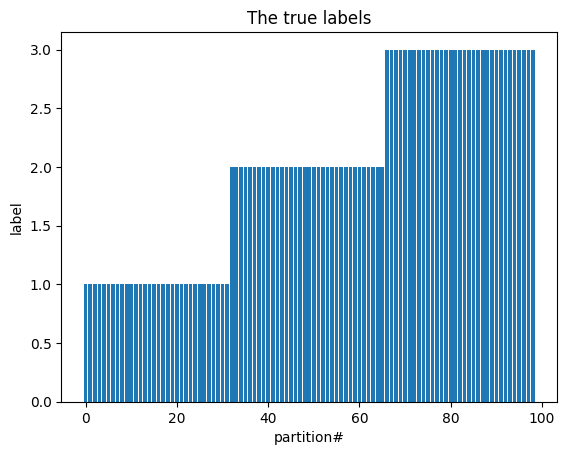

In [280]:
trueLabels = np.array(trueLabels)
plotLabels(trueLabels,"true")

In [281]:
wordFreq = getWordFrequency(chunks,refList)

text0
text1
text2
text3
text4
text5
text6
text7
text8
text9
text10
text11
text12
text13
text14
text15
text16
text17
text18
text19
text20
text21
text22
text23
text24
text25
text26
text27
text28
text29
text30
text31
text32
text33
text34
text35
text36
text37
text38
text39
text40
text41
text42
text43
text44
text45
text46
text47
text48
text49
text50
text51
text52
text53
text54
text55
text56
text57
text58
text59
text60
text61
text62
text63
text64
text65
text66
text67
text68
text69
text70
text71
text72
text73
text74
text75
text76
text77
text78
text79
text80
text81
text82
text83
text84
text85
text86
text87
text88
text89
text90
text91
text92
text93
text94
text95
text96
text97
text98


In [282]:
# cluster with kmeans
k = len(bookTexts) # k: number of clusters

In [283]:
# define the k-means object
kmeans = KMeans(n_clusters = k)
# compute the k-means model of the chunks
kmeans.fit(wordFreq)

KMeans(n_clusters=3)

In [284]:
# predict the labels of the chunks
predLabels = kmeans.predict(wordFreq)
predLabels +=1

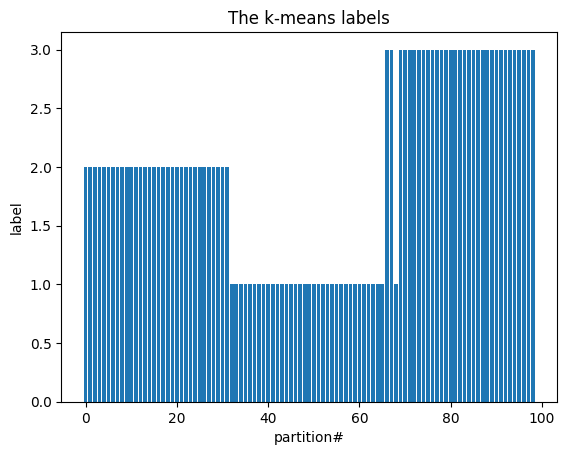

In [285]:
# plot the k-means prediction
plotLabels(predLabels,"k-means")

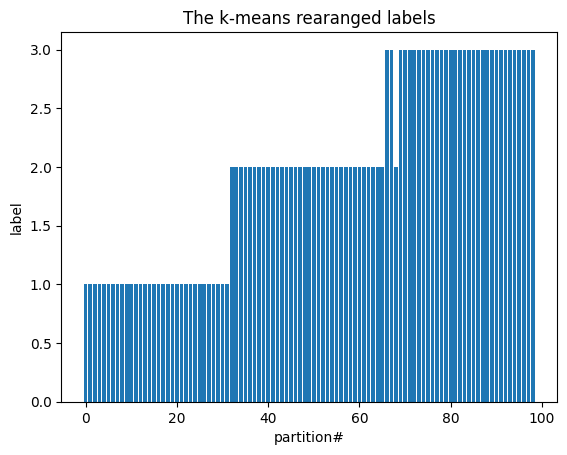

In [286]:
# rearange predicted labels according to the true labels
predictedLabels = rearangeLabels(trueLabels,predLabels,k)
plotLabels(predictedLabels,"k-means rearanged")

In [287]:
trueLabels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [288]:
predictedLabels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3.,
       2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.])

In [293]:
sum(predictedLabels!=trueLabels)

np.int64(1)

In [301]:
sum(predictedLabels==1)*window

np.int64(480000)

In [302]:
sum(predictedLabels==2)*window

np.int64(525000)

In [303]:
sum(predictedLabels==3)*window

np.int64(480000)

In [305]:
[len(text) for text in texts]

[483150, 520189, 506564]

In [309]:
for i in range(3):
 print(len(texts[i])-sum(predictedLabels==i+1)*window)

3150
-4811
26564
